In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

### Эксперимент

In [8]:
from hypers import weight_hypers
from hypers import alpha_hypers 
from draw import draw_all

In [3]:
from experiment import run_experiments, load_experiments
filepath = '../results/df_experiment_1.csv'

In [15]:
# length = 1000
# lower_bound, upper_bound = 50, 200

windows = [5, 10, 20, 50]
interesting_w = ["default", "simple_101", "simple_11", "simple_2"]
interesting_a = ["default", "simple_05", "simple_2", "exp"]


# experiments, df = run_experiments(windows, interesting_w, interesting_a, filepath)
df = pd.read_csv(filepath, index_col=0, sep='\t')
df
### !legacy experiments = load_experiments('../results/experiment_1.json')

,train_window,weight_function,alpha_function,mean,random_1,random_2
5,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),132235.60,145440.07,119031.13
1,5,1 / (x^1.01),1 / (x + 1),98817.85,103139.59,94496.11
2,5,1 / (x^1.01),1 / (x + 1)^0.5,133576.47,134744.04,132408.89
4,5,1 / (x^1.01),1 / (x + 1)^2),76643.56,87825.17,65461.95
0,5,1 / (x^1.01),1 / e^x,76610.87,87802.82,65418.92
6,5,1 / (x^1.1),1 / (x + 1),101248.60,106539.00,95958.19
3,5,1 / (x^2),1 / (x + 1),142484.70,180472.52,104496.89
12,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),107315.52,100511.31,114119.73
8,10,1 / (x^1.01),1 / (x + 1),73171.86,66094.05,80249.66
9,10,1 / (x^1.01),1 / (x + 1)^0.5,105386.68,91798.62,118974.74


In [11]:
df_w = df[df["alpha_function"] == "1 / (x + 1)"].iloc[:, :4]
df_w

,train_window,weight_function,alpha_function,mean
5,5,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),132235.60
1,5,1 / (x^1.01),1 / (x + 1),98817.85
6,5,1 / (x^1.1),1 / (x + 1),101248.60
3,5,1 / (x^2),1 / (x + 1),142484.70
12,10,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),107315.52
8,10,1 / (x^1.01),1 / (x + 1),73171.86
13,10,1 / (x^1.1),1 / (x + 1),76679.16
10,10,1 / (x^2),1 / (x + 1),113463.96
19,20,1 / ((x + 1) * (ln(x + 1))^2),1 / (x + 1),105101.18
15,20,1 / (x^1.01),1 / (x + 1),70084.30


In [6]:
df_a = df[df["weight_function"] == "1 / (x^1.01)"].iloc[:,:4]
df_a

,train_window,weight_function,alpha_function,mean
1,5,1 / (x^1.01),1 / (x + 1),98817.85
2,5,1 / (x^1.01),1 / (x + 1)^0.5,133576.47
4,5,1 / (x^1.01),1 / (x + 1)^2),76643.56
0,5,1 / (x^1.01),1 / e^x,76610.87
8,10,1 / (x^1.01),1 / (x + 1),73171.86
9,10,1 / (x^1.01),1 / (x + 1)^0.5,105386.68
11,10,1 / (x^1.01),1 / (x + 1)^2),88774.46
7,10,1 / (x^1.01),1 / e^x,89692.20
15,20,1 / (x^1.01),1 / (x + 1),70084.30
16,20,1 / (x^1.01),1 / (x + 1)^0.5,86541.63


In [25]:
df_mean = df[["train_window", "mean"]].groupby("train_window").mean()

In [27]:
print(df_mean.to_latex())

\begin{tabular}{lr}
\toprule
 & mean \\
train_window &  \\
\midrule
5 & 108802.521429 \\
10 & 93497.691429 \\
20 & 105053.301429 \\
50 & 125068.372857 \\
\bottomrule
\end{tabular}



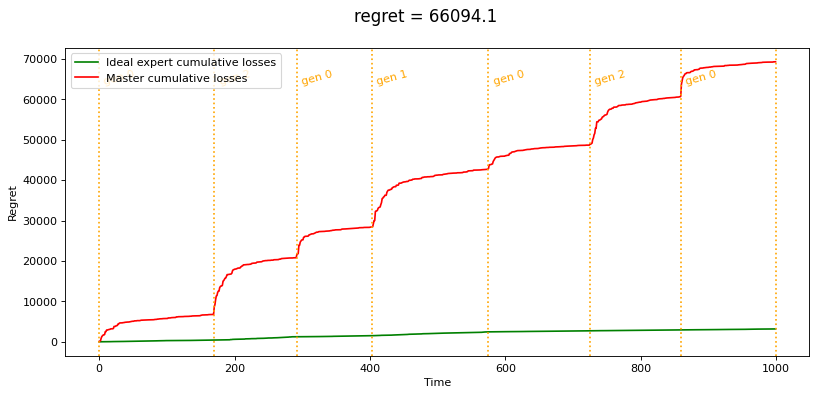

In [21]:
# for experiment in experiments[50:56]:
experiment = experiments[8]
draw_all(experiment.logs, show=["master", "ideal"], show_experts=[], show_axes=["regret"], height_ratios=[1], 
          suptitle=f"regret = {experiment.regret:.1f}", fig_size=(12, 5))